# Working with DACB to create function to compute pairwise distance matrix across rows. 

In [103]:
import numpy
import pandas as pd
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
df = pd.DataFrame([[-1, 0, 1], [1, 0, -1], [.5, 0, .5]])

In [87]:
df

,0,1,2
0,-1.0,0,1.0
1,1.0,0,-1.0
2,0.5,0,0.5


In [88]:
def compare_all_rows_pearson(df):
    """df is a pandas dataframe
        returns a symmetrical metric matrix"""
    
    metric = pd.DataFrame()
    
    for index_i, row_i in df.iterrows():
        for index_j, row_j in df.iterrows():
            if index_j < index_i:
                continue
            if index_j == index_i:
                metric.loc[index_i, index_j] = 1
                continue
            metric.loc[index_i, index_j] = row_i.corr(row_j, 'pearson')
            metric.loc[index_j, index_i] = metric.loc[index_i, index_j]
            
    return metric

In [89]:
compare_all_rows_pearson(df)

,0,1,2
0,1.0,-1.0,0.0
1,-1.0,1.0,0.0
2,0.0,0.0,1.0


In [93]:
def simple_pearson(x, y):
    return pearsonr(x, y)[0]

def simple_euclidean(x, y):
    return numpy.linalg.norm(x - y, ord=2) 

def compare_all_rows_commutative(df, compare):
    """df is a pandas dataframe
    compare is a method for comparing two vectors which is commutative
        returns a symmetrical metric matrix"""
    
    metric = pd.DataFrame()
    
    for index_i, row_i in df.iterrows():
        for index_j, row_j in df.iterrows():
            if index_j < index_i:
                continue
            metric.loc[index_i, index_j] = compare(row_i, row_j)
            metric.loc[index_j, index_i] = metric.loc[index_i, index_j]
            
    return metric

In [94]:
compare_all_rows_commutative(df, simple_pearson)

,0,1,2
0,1.0,-1.0,0.0
1,-1.0,1.0,0.0
2,0.0,0.0,1.0


In [104]:
Z = compare_all_rows_commutative(df, simple_euclidean)

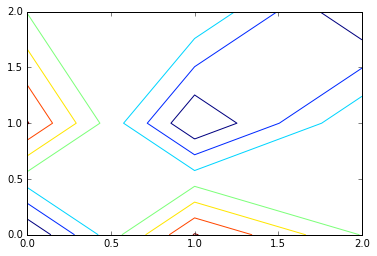

In [105]:
plt.contour(Z)

# Pearson Correlation Example from stack exchange (Congruency table in pandas by piRSquared) 

In [ ]:
import pandas as pd

In [ ]:
def corr(df, step = len(df.columns), mask_diagonal=False):

    n = df.shape[0]

    def corr_closure(df):
        d = df.values
        sums = d.sum(0, keepdims=True)
        stds = d.std(0, keepdims=True)

        def corr_(k=0, l=10):
            d2 = d.T.dot(d[:, k:l])
            sums2 = sums.T.dot(sums[:, k:l])
            stds2 = stds.T.dot(stds[:, k:l])

            return pd.DataFrame((d2 - sums2 / n) / stds2 / n,
                                df.columns, df.columns[k:l])

        return corr_

    c = corr_closure(df)

    step = min(step, df.shape[1])

    tups = zip(range(0, n, step), range(step, n + step, step))

    corr_table = pd.concat([c(*t) for t in tups], axis=1)

    if mask_diagonal:
        np.fill_diagonal(corr_table.values, np.nan)

    return corr_table